# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time




import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing




if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model





base_directory_data_str =  base_directory_str + '/data/figure8_S3_data/'
base_directory_figure_str =  base_directory_str + '/figures/figure8_S3/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=fd490bd14a37d56905a1ce8c58c17e90c90ed9c382f44c4445db12ebf784c858
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST 

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )

In [ ]:

batch_size = 1000


def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

str_dir_data_mnist = base_directory_str + "/mnist_data/"

copytree(str_dir_data_mnist , "/content/mnist_data" )


train_loader1 , test_loader1 , code_map1 , x_shape1   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]    , batch_size=batch_size , device = device  , flatten = True  , size=15  )




train_loader2 , test_loader2 , code_map2 , x_shape2   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]    , batch_size=batch_size , device = device  , flatten = True  , size=15  )





Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Flexibility one run function

In [ ]:

def one_run_function_flexibility(str_dir_data_BASE_flex ,
              Column_Normalize_W_ = None
            , bias = True
            , lr = .0003
            , N_repeat = 1
            , N_hidden = 50
            , label_smoothing = None
            , FA_method=True
            , skip_existing = False
           ):



  N_epoch = 100

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden




  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)

  net = my_model.my_network1(layers_info , bias = bias)
  net.set_learning_rate(lr)




  N_layers = len(layers_info)-1

  list_Z_99 = []





  if FA_method== True :dir_str =  "FA"
  else: dir_str =  "BP"
  
  dir_str = dir_str + "(lr_" +  str(lr).replace('.', 'd')  + ")"

  
  if Column_Normalize_W_!=None  and type(Column_Normalize_W_)==list :
   
    dir_str = dir_str +  "(CWN_" + str(Column_Normalize_W_[0]).replace('.', 'd') + "_" + str(Column_Normalize_W_[1]).replace('.', 'd') + ")"
  elif Column_Normalize_W_!=None  :dir_str = dir_str +  "(CNW_" + str(Column_Normalize_W_).replace('.', 'd') + ")"
  else: dir_str = dir_str +  "(NoCWN)"




  if bias == True :
    dir_str = dir_str + "(Bias)"
  else:
    dir_str = dir_str + "(NoBias)"



  if label_smoothing != None : dir_str = dir_str + "(LS_" + str(label_smoothing[0]).replace('.', 'd') + str(label_smoothing[1]).replace('.', 'd') + ")"
  else: dir_str = dir_str + "(NoLS)"

  print("\n")

  print(dir_str)

  str_t = dir_str

  dir_str = str_dir_data_BASE_flex + dir_str
  

  dir_str =   dir_str + "/"

 
  if not os.path.exists(dir_str):
      os.makedirs(dir_str)
  else:
    print("############## path exist #################\n\n######################")
    if os.path.isfile(dir_str + "/test_accuracy_list_repeat.txt")  and skip_existing==True: 
      print("############## file exist #################\n\n######################\n")

      return str_t


  train_loader1 , test_loader1 , code_map1 , x_shape1   =   my_dataset.get_MNIST_dataset(  coding_layers = [N_hidden]  , ones_in_layes = [ N_hidden//10 ]    , batch_size=batch_size , device = device  , flatten = True  , size=15  )


  angle_W_B13 = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader1)*2 ]  )
  angle_dW_bp_fa13 = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader1)*2 ]  )

  test_accuracy_list_repeat = []

  for rep in range(N_repeat):
    print('\n')
    print(rep)

    test_accuracy_list1=[]
    net = my_model.my_network1(layers_info , bias = bias )
    net.set_learning_rate(lr)

    if Column_Normalize_W_!=None  and type(Column_Normalize_W_)==list :
      net.seed_norms(Column_Normalize_W_[0],Column_Normalize_W_[1])
      net.column_normalize_W()
  
    elif  Column_Normalize_W_!=None :
      net.column_normalize_W(Column_Normalize_W_)
  
    train_loader1 , test_loader1 , code_map1 , x_shape1   =   my_dataset.get_MNIST_dataset(  coding_layers = [N_hidden]  , ones_in_layes = [ N_hidden//10 ]    , batch_size=batch_size , device = device  , flatten = True  , size=15  )

    for epoch_i in range(N_epoch):
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader1:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map1 , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal

      test_accuracy_list1.append(acc*100)

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )

      for iter , (x_in, y_n) in enumerate( train_loader1 ):


        for k in range(N_layers):
          angle_W_B13[  k  ,  rep  ,  epoch_i*len(train_loader1) +  iter ] = my_weight.angle( net.W[k] , net.B[k].t()  )  

        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        L_f = net.forward(x_in)

        E = y_n - L_f

        if FA_method== True :Delta , Delta_bias = net.BP_TRW(E)
        else: Delta , Delta_bias= net.backprop(E)

     
        net.step_W(Delta)

        if bias==True :  net.step_bias(Delta_bias)
    
        if Column_Normalize_W_!=None  and type(Column_Normalize_W_)==list : 
          net.column_normalize_W()
     
        elif Column_Normalize_W_!=None  :
           net.column_normalize_W(Column_Normalize_W_)
  




    for i in range( len(net.Z) ):
      list_Z_99.append( net.Z[i] )

    print('label changing')

    train_loader2 , test_loader2 , code_map2 , x_shape2   =   my_dataset.get_MNIST_dataset(  coding_layers = [N_hidden]  , ones_in_layes = [ N_hidden//10 ]    , batch_size=batch_size , device = device  , flatten = True  , size=15  )

    for epoch_i in range(N_epoch):
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader2:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map2 , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal

      test_accuracy_list1.append(acc*100)

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )

      for iter , (x_in, y_n) in enumerate( train_loader2 ):

        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        L_f = net.forward(x_in)


        E = y_n - L_f


        if FA_method== True :  Delta , Delta_bias = net.BP_TRW(E)
        else:  Delta, Delta_bias = net.backprop(E)

        net.step_W(Delta)

        if bias==True :  net.step_bias(Delta_bias)

        if Column_Normalize_W_!=None  and type(Column_Normalize_W_)==list : net.column_normalize_W()
        elif  Column_Normalize_W_!=None : net.column_normalize_W(Column_Normalize_W_)



    test_accuracy_list_repeat . append( test_accuracy_list1 )







  str_direction = dir_str + "test_accuracy_list_repeat"+ ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( test_accuracy_list_repeat  , fp)

  str_direction = dir_str + "list_Z_99"+ ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( list_Z_99  , fp)





  return net



# Run

In [ ]:
one_run_function_flexibility(base_directory_data_str  ,
              Column_Normalize_W_ = 0.6
            , bias = False
            , lr = .0003
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = None
            , FA_method=True
            , skip_existing = False
           )

[225, 50, 50, 50, 50, 50]


FA(lr_0d0003)(CNW_0d6)(NoBias)(NoLS)
############## path exist #################

######################


0
epoch: 0,test_accu2: 0.10300000458955764
epoch: 10,test_accu2: 0.7148000359535217
epoch: 20,test_accu2: 0.8280000329017639
epoch: 30,test_accu2: 0.8781000435352325
epoch: 40,test_accu2: 0.8902000427246094
epoch: 50,test_accu2: 0.8974000453948975
epoch: 60,test_accu2: 0.9019000411033631
epoch: 70,test_accu2: 0.9052000343799591
epoch: 80,test_accu2: 0.9085000395774842
epoch: 90,test_accu2: 0.9105000436306
label changing
epoch: 0,test_accu2: 0.20240001231431962
epoch: 10,test_accu2: 0.868800038099289
epoch: 20,test_accu2: 0.8750000417232513
epoch: 30,test_accu2: 0.8804000377655029
epoch: 40,test_accu2: 0.8852000415325165
epoch: 50,test_accu2: 0.8886000335216522
epoch: 60,test_accu2: 0.8936000406742096
epoch: 70,test_accu2: 0.8970000386238098
epoch: 80,test_accu2: 0.9003000497817993
epoch: 90,test_accu2: 0.9014000415802002


1
epoch: 0,test_accu2: 0.11910

In [ ]:
one_run_function_flexibility(base_directory_data_str ,
              Column_Normalize_W_ = 0.6
            , bias = False
            , lr = .0003
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = None
            , FA_method=False
            , skip_existing = False
           )

[225, 50, 50, 50, 50, 50]


BP(lr_0d0003)(CNW_0d6)(NoBias)(NoLS)
############## path exist #################

######################


0
epoch: 0,test_accu2: 0.10430000647902489
epoch: 10,test_accu2: 0.8767000436782837
epoch: 20,test_accu2: 0.9139000475406647
epoch: 30,test_accu2: 0.9217000484466553
epoch: 40,test_accu2: 0.9290000438690186
epoch: 50,test_accu2: 0.9317000448703766
epoch: 60,test_accu2: 0.9344000399112702
epoch: 70,test_accu2: 0.9320000350475312
epoch: 80,test_accu2: 0.9297000408172608
epoch: 90,test_accu2: 0.9331000506877899
label changing
epoch: 0,test_accu2: 0.24280001372098922
epoch: 10,test_accu2: 0.9300000429153442
epoch: 20,test_accu2: 0.9277000427246094
epoch: 30,test_accu2: 0.9299000442028046
epoch: 40,test_accu2: 0.9299000442028046
epoch: 50,test_accu2: 0.9303000450134278
epoch: 60,test_accu2: 0.930800050497055
epoch: 70,test_accu2: 0.9312000453472138
epoch: 80,test_accu2: 0.9315000414848328
epoch: 90,test_accu2: 0.9313000559806823


1
epoch: 0,test_accu2: 0.09

In [ ]:
one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = None
            , bias = False
            , lr = .0003
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = None
            , FA_method=False
            , skip_existing = False
           )

[225, 50, 50, 50, 50, 50]


BP(lr_0d0003)(NoCWN)(NoBias)(NoLS)
############## path exist #################

######################


0
epoch: 0,test_accu2: 0.09290000423789024
epoch: 10,test_accu2: 0.9432000458240509
epoch: 20,test_accu2: 0.9588000416755676
epoch: 30,test_accu2: 0.9651000440120697
epoch: 40,test_accu2: 0.9674000442028046
epoch: 50,test_accu2: 0.9703000366687775
epoch: 60,test_accu2: 0.9702000439167022
epoch: 70,test_accu2: 0.9707000494003296
epoch: 80,test_accu2: 0.9703000485897064
epoch: 90,test_accu2: 0.9698000431060791
label changing
epoch: 0,test_accu2: 0.00990000031888485
epoch: 10,test_accu2: 0.47320002019405366
epoch: 20,test_accu2: 0.47810002565383913
epoch: 30,test_accu2: 0.4788000226020813
epoch: 40,test_accu2: 0.47910002171993255
epoch: 50,test_accu2: 0.47950002551078796
epoch: 60,test_accu2: 0.47960002422332765
epoch: 70,test_accu2: 0.4772000193595886
epoch: 80,test_accu2: 0.4644000232219696
epoch: 90,test_accu2: 0.48000001907348633


1
epoch: 0,test_accu2:

In [ ]:
one_run_function_flexibility(base_directory_data_str  , 
              Column_Normalize_W_ = None
            , bias = False
            , lr = .0003
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = None
            , FA_method=True
            , skip_existing = False
           )


[225, 50, 50, 50, 50, 50]


FA(lr_0d0003)(NoCWN)(NoBias)(NoLS)
############## path exist #################

######################


0
epoch: 0,test_accu2: 0.145400008559227
epoch: 10,test_accu2: 0.7243000268936157
epoch: 20,test_accu2: 0.8280000269412995
epoch: 30,test_accu2: 0.8599000334739685
epoch: 40,test_accu2: 0.8743000388145447
epoch: 50,test_accu2: 0.8857000350952149
epoch: 60,test_accu2: 0.8933000445365906
epoch: 70,test_accu2: 0.9008000433444977
epoch: 80,test_accu2: 0.9057000517845154
epoch: 90,test_accu2: 0.910500031709671
label changing
epoch: 0,test_accu2: 0.07030000425875187
epoch: 10,test_accu2: 0.6434000372886658
epoch: 20,test_accu2: 0.6482000350952148
epoch: 30,test_accu2: 0.6504000365734101
epoch: 40,test_accu2: 0.6511000275611878
epoch: 50,test_accu2: 0.6519000411033631
epoch: 60,test_accu2: 0.6530000388622283
epoch: 70,test_accu2: 0.6529000341892243
epoch: 80,test_accu2: 0.6516000330448151
epoch: 90,test_accu2: 0.6524000287055969


1
epoch: 0,test_accu2: 0.083700

# Plot figure 8

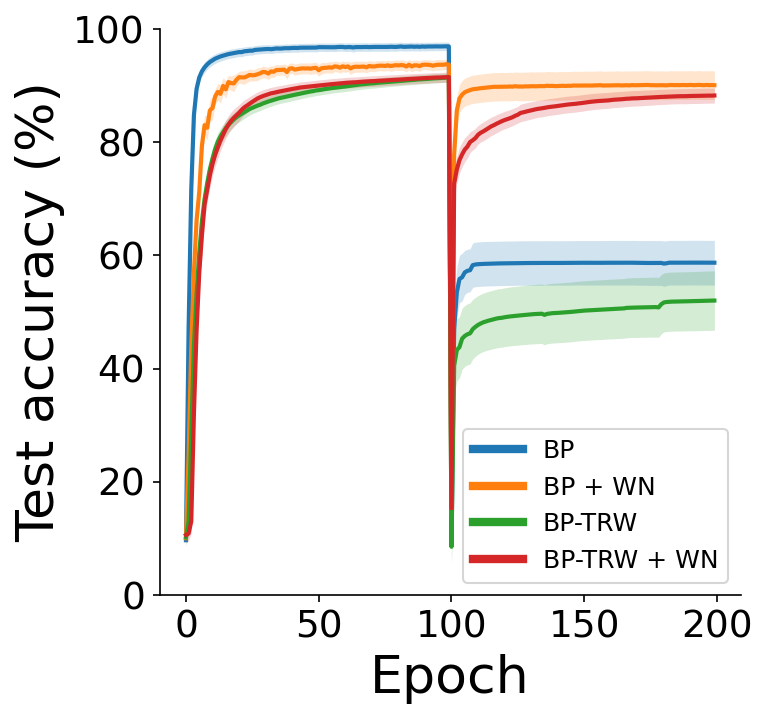

In [ ]:


dir_str = base_directory_data_str + '/BP(lr_0d0003)(NoCWN)(NoBias)(NoLS)/test_accuracy_list_repeat.txt'
with open( dir_str , "rb") as fp:   #Pickling
  testaccurac_1 = pickle.load(fp)

dir_str = base_directory_data_str + '/BP(lr_0d0003)(CNW_0d6)(NoBias)(NoLS)/test_accuracy_list_repeat.txt'
with open( dir_str , "rb") as fp:   #Pickling
  testaccurac_2 = pickle.load(fp)


dir_str = base_directory_data_str + '/FA(lr_0d0003)(NoCWN)(NoBias)(NoLS)/test_accuracy_list_repeat.txt'

with open( dir_str , "rb") as fp:   #Pickling
  testaccurac_3 = pickle.load(fp)

dir_str = base_directory_data_str + '/FA(lr_0d0003)(CNW_0d6)(NoBias)(NoLS)/test_accuracy_list_repeat.txt'

with open( dir_str , "rb") as fp:   #Pickling
  testaccurac_4 = pickle.load(fp)






N_repetition = len(testaccurac_1)
N_epoch = len(testaccurac_1[0])
figsize_ = (5,5)

plt.figure(num = None, figsize=figsize_ , dpi=150, facecolor='w', edgecolor='k')

x = torch.tensor(testaccurac_1)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[0] ,label = "BP", linewidth=2  )   
x_sem = x.std(dim=0)/np.sqrt(N_repetition)+0.7
plt.fill_between(  range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[0] , alpha=0.2 , linewidth=0)


x = torch.tensor(testaccurac_2)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[1] ,label = "BP + WN", linewidth=2  )   
x_sem = x.std(dim=0)/np.sqrt(N_repetition)+0.7
plt.fill_between(  range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[1] , alpha=0.2 , linewidth=0)

x = torch.tensor(testaccurac_3)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[2] ,label = "BP-TRW", linewidth=2  )   
x_sem = x.std(dim=0)/np.sqrt(N_repetition)+0.7
plt.fill_between(  range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[2] , alpha=0.2 , linewidth=0)

x = torch.tensor(testaccurac_4)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[3] ,label = "BP-TRW + WN", linewidth=2  )   
x_sem = x.std(dim=0)/np.sqrt(N_repetition)+0.7
plt.fill_between(  range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[3] , alpha=0.2 , linewidth=0)

plt_fontsize_label__ = 25
plt.xlabel("Epoch", fontsize= plt_fontsize_label__)
plt.ylabel(r"Test accuracy (%)", fontsize= plt_fontsize_label__)

leg = plt.legend( loc  = 'lower right' , fontsize = 12 )
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.ylim(0,100)
plt.savefig( base_directory_figure_str + 'flexibility3.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show( )

5


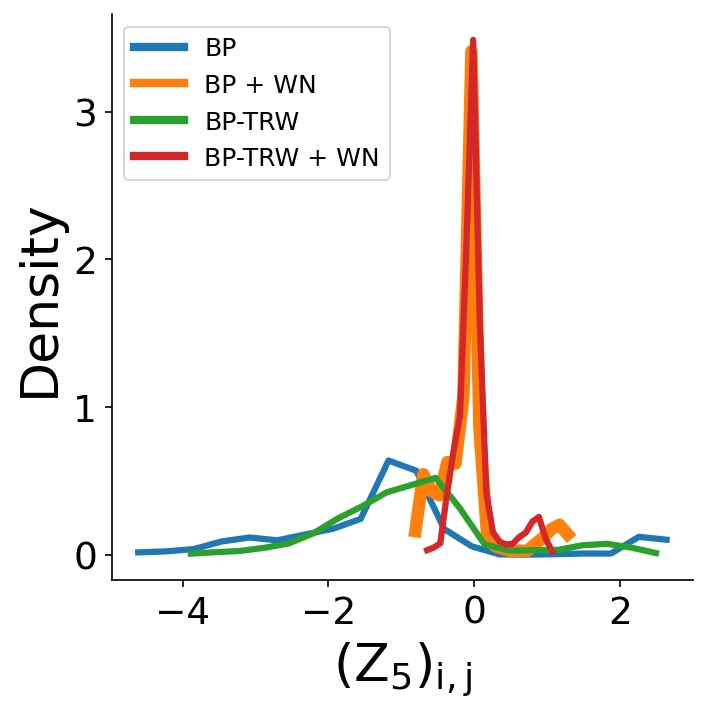

In [ ]:













str_dir = base_directory_data_str + '/FA(lr_0d0003)(CNW_0d6)(NoIBN)(NoBias)(NoLS)/list_Z_99.txt'

with open( str_dir , "rb") as fp:   #Pickling
  FA_list_Z_100_WN = pickle.load(fp)






str_dir = base_directory_data_str + '/FA(lr_0d0003)(NoCWN)(NoIBN)(NoBias)(NoLS)/list_Z_99.txt'

with open( str_dir , "rb") as fp:   #Pickling
  FA_list_Z_100_NWN = pickle.load(fp)






str_dir = base_directory_data_str + '/BP(lr_0d0003)(NoCWN)(NoIBN)(NoBias)(NoLS)/list_Z_99.txt'

with open( str_dir , "rb") as fp:   #Pickling
  BP_list_Z_100_NWN = pickle.load(fp)






str_dir = base_directory_data_str + '/BP(lr_0d0003)(CNW_0d6)(NoIBN)(NoBias)(NoLS)/list_Z_99.txt'

with open( str_dir , "rb") as fp:   #Pickling
  BP_list_Z_100_WN = pickle.load(fp)



plt_fontsize_label__2 = 15




l=5


print(l)

plt.figure(num = None, figsize=(5,5) , dpi=150, facecolor='w', edgecolor='k')

y,x = np.histogram(BP_list_Z_100_NWN[l].flatten().cpu() , density = True , bins=20)
xx = []
for i in range(len(y)):
  xx.append( (x[i]+x[i+1])/2  ) 
plt.plot( xx ,y,'-' , linewidth = 3 ,label = "BP" )


y,x = np.histogram(BP_list_Z_100_WN[l].flatten().cpu() , density = True , bins=20)
xx = []
for i in range(len(y)):
  xx.append( (x[i]+x[i+1])/2  ) 
plt.plot( xx ,y,'-', linewidth = 6 ,label = "BP + WN" )



y,x = np.histogram(FA_list_Z_100_NWN[l].flatten().cpu() , density = True , bins=20)
xx = []
for i in range(len(y)):
  xx.append( (x[i]+x[i+1])/2  ) 
plt.plot( xx ,y,'-' , linewidth = 3 ,label = "BP-TRW"  )



y,x = np.histogram(FA_list_Z_100_WN[l].flatten().cpu() , density = True , bins=20)
xx = []
for i in range(len(y)):
  xx.append( (x[i]+x[i+1])/2  ) 
plt.plot( xx ,y,'-' , linewidth = 3 ,label = "BP-TRW + WN")


plt_fontsize_label__ = 25

leg = plt.legend( fontsize= 12)
plt.xlabel(r"$(Z_{" + str(l) + "})_{i,j}$", fontsize= plt_fontsize_label__)
plt.ylabel(r"Density", fontsize= plt_fontsize_label__)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.savefig( base_directory_figure_str + 'flexibility_dist_100.jpg' , dpi=300 , bbox_inches='tight' ) 


plt.show()



#FA run for  sensitivity analysis

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ None   ]:


            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=True
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [  0.0003  ]:

        for LS in [ None   ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=True
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ [0.95 , 0.05]   ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=True
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [   0.0003  ]:

        for LS in [   [0.95 , 0.05]  ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=True
            , skip_existing = True
           )

#BP run for  sensitivity analysis

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ] :

    for lr in [ 0.0005  ]:

        for LS in [ None   ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=False
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [  0.0003  ]:

        for LS in [ None   ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=False
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ [0.95 , 0.05]   ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=False
            , skip_existing = True
           )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [   0.0003  ]:

        for LS in [   [0.95 , 0.05]  ]:

            one_run_function_flexibility(base_directory_data_str , 
              Column_Normalize_W_ = Column_Normalize_W
            , bias = False
            , lr = lr
            , N_repeat = 10
            , N_hidden = 50
            , label_smoothing = LS
            , FA_method=False
            , skip_existing = True
           )

# Plot test accuracy sensitivity analysis

In [ ]:
experiment_list_BP = []


for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:
  for LS in [ [0.95 , 0.05] , None ]:

    temp_list = []
    for lr in [ 0.0005 ,  0.0003 ]:


      str_t  =  one_run_function_flexibility(base_directory_data_str , 
          Column_Normalize_W_ = Column_Normalize_W
        , bias = False
        , lr = lr
        , N_repeat = 10
        , N_hidden = 50
        , label_smoothing = LS
        , FA_method=False
        , skip_existing = True
      )

      temp_list.append(str_t)

    experiment_list_BP.append(temp_list)

experiment_list_FA = []


for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:
  for LS in [ [0.95 , 0.05] , None ]:

    temp_list = []
    for lr in [ 0.0005 ,  0.0003 ]:


      str_t  =  one_run_function_flexibility(base_directory_data_str , 
          Column_Normalize_W_ = Column_Normalize_W
        , bias = False
        , lr = lr
        , N_repeat = 10
        , N_hidden = 50
        , label_smoothing = LS
        , FA_method=True
        , skip_existing = True
      )

      temp_list.append(str_t)

    experiment_list_FA.append(temp_list)

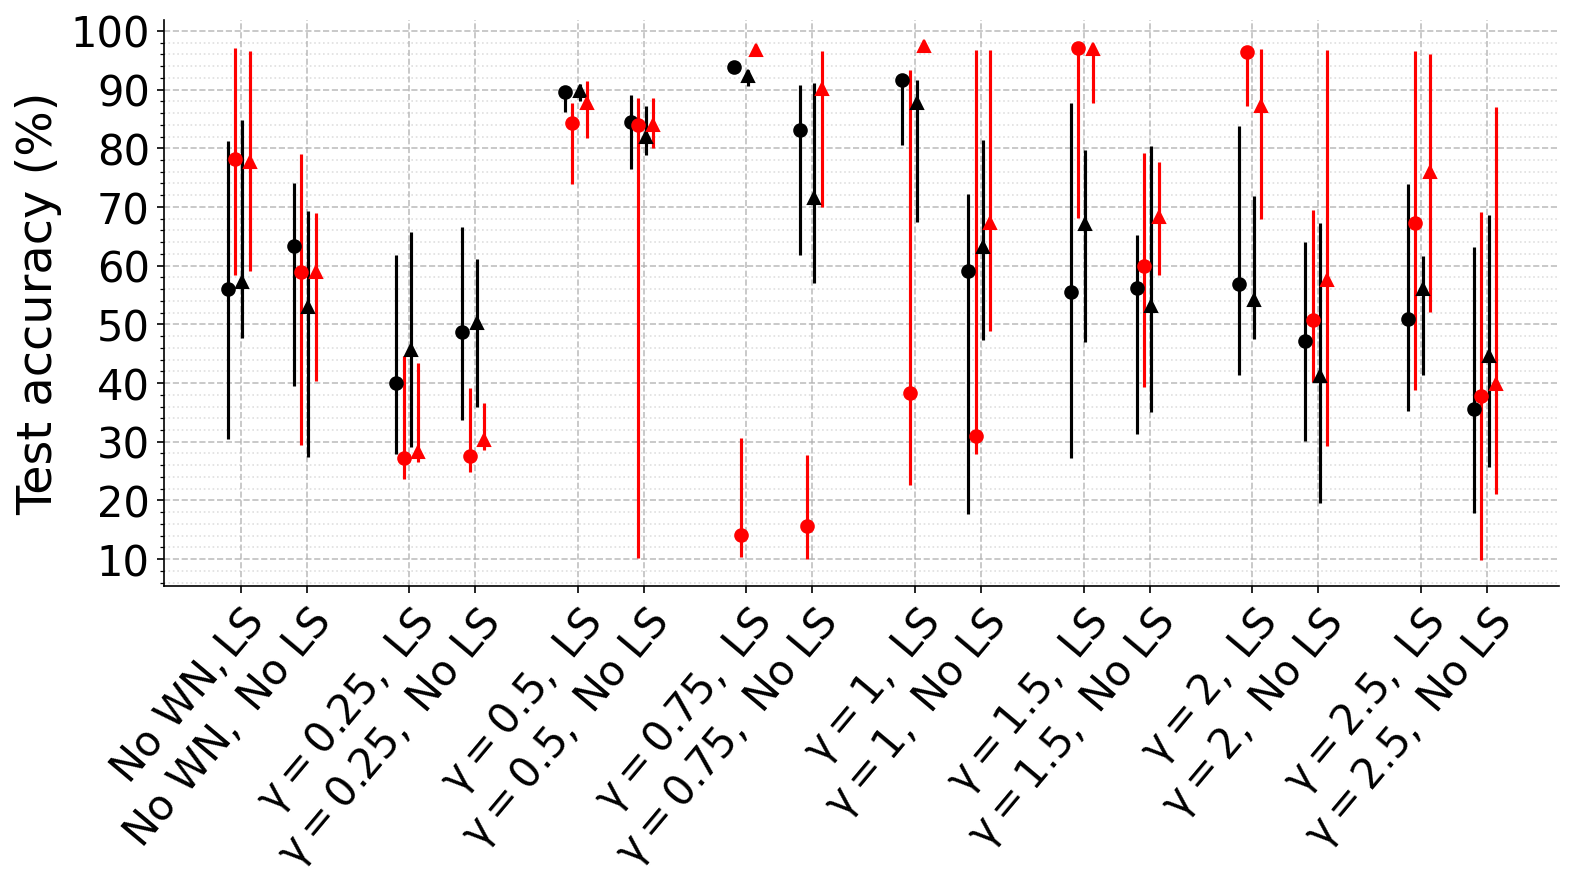

In [ ]:

plt_fontsize_label_ = 23



figsize_ = (12,5)
plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')



  



tick_list = []



x_start=1
for exp_i in range(len(experiment_list_FA)):

  for ii in [0,1]:
      str1 = experiment_list_FA[exp_i][ii]

      str_directory2 = base_directory_data_str + str1 + "/test_accuracy_list_repeat.txt"



      with open( str_directory2 , "rb") as fp:   #Pickling
        test_accuracy_list = pickle.load(fp)




      test_accuracy_list = torch.tensor(test_accuracy_list)

      median = test_accuracy_list[:,-10:].mean(dim=1).flatten().median()
      min1 = test_accuracy_list[:,-10:].mean(dim=1).flatten().min()
      max1 = test_accuracy_list[:,-10:].mean(dim=1).flatten().max()

      xerr_ = torch.zeros([2,1])
      xerr_[0,0] = - min1 + median
      xerr_[1,0] = max1 - median
   
      if ii in [0]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='o' , color = 'k')
      if ii in [1]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='^' , color = 'k')

      x_start = x_start + 2


      str1 = experiment_list_BP[exp_i][ii]

      str_directory2 = base_directory_data_str + str1 + "/test_accuracy_list_repeat.txt"



      with open( str_directory2 , "rb") as fp:   #Pickling
        test_accuracy_list = pickle.load(fp)




      test_accuracy_list = torch.tensor(test_accuracy_list)


      median = test_accuracy_list[:,-10:].mean(dim=1).flatten().median()
      min1 = test_accuracy_list[:,-10:].mean(dim=1).flatten().min()
      max1 = test_accuracy_list[:,-10:].mean(dim=1).flatten().max()

      xerr_ = torch.zeros([2,1])
      xerr_[0,0] = - min1 + median
      xerr_[1,0] = max1 - median
    
      if ii in [0]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='o' , color = 'red')
      if ii in [1]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='^' , color = 'red')

      x_start = x_start + 2



  tick_list.append(x_start-6)  

  x_start = x_start + 10

  if exp_i%2 ==1 :
    x_start = x_start + 10





plt.ylabel(r"Test accuracy (%)", fontsize= plt_fontsize_label_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xticks( np.array(tick_list) + 1.5 , [r"$No\ WN,LS$" , r"$No\ WN,\ No\ LS$"
                  , r"$\gamma=0.25,\ LS$" , r"$\gamma=0.25,\ No \ LS$"
                  , r"$\gamma=0.5,\ LS$", r"$\gamma=0.5,\ No \ LS$"
                  , r"$\gamma=0.75,\ LS$" , r"$\gamma=0.75,\ No \ LS$"
                  , r"$\gamma=1,\ LS$"  , r"$\gamma=1,\ No \ LS$"
                  , r"$\gamma=1.5,\ LS$" , r"$\gamma=1.5,\ No \ LS$"
                  , r"$\gamma=2,\ LS$"  , r"$\gamma=2,\ No \ LS$"
                  , r"$\gamma=2.5,\ LS$"  , r"$\gamma=2.5,\ No \ LS$"
                         ], rotation=50 , ha='right' , rotation_mode="anchor" )


ax = plt.gca()

ax.yaxis.set_major_locator(MultipleLocator(10))

ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='both')

ax.grid(which='major' , linestyle='--' , alpha=0.8)

ax.grid(which='minor',linestyle=':', alpha=0.4)

plt.savefig( base_directory_figure_str +  'sesitivity_analysis_flexibility.jpg' , dpi=300 , bbox_inches='tight') 


plt.show()


